# .

In [65]:
import calendar
import matplotlib.pyplot as plt
from datetime import datetime

def create_calendar(year: int, month: int, days: list[int], amounts: list[int]):
    """
    달력을 생성하고 반환하는 함수.
    
    Parameters:
        year (int): 연도
        month (int): 월
        days (list[int]): 거래가 발생한 날짜 리스트
        amounts (list[int]): 각 날짜에 해당하는 거래 금액 리스트
    
    Returns:
        matplotlib.figure.Figure: 생성된 달력의 Figure 객체
    """
    # 오늘 날짜 가져오기
    today = datetime.now()
    current_day = today.day if today.year == year and today.month == month else None

    # 날짜별 금액 데이터를 딕셔너리로 생성
    transactions = dict(zip(days, amounts))

    # 달력을 2D 배열로 생성
    cal = calendar.monthcalendar(year, month)

    # 달력 그리기
    fig, ax = plt.subplots(figsize=(10, 8))
    ax.axis('off')

    # 제목 표시
    ax.set_title(f"{year}Y {month}M", fontsize=20, weight='bold', pad=20)

    # 요일 헤더 생성
    week_days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
    for col, day in enumerate(week_days):
        ax.text(col, 6, day, ha='center', va='center', fontsize=14, weight='bold')

    # 날짜와 금액 데이터를 매핑하여 표시
    for row, week in enumerate(cal):
        for col, day in enumerate(week):
            if day != 0:  # 날짜가 있는 경우만 처리
                amount = transactions.get(day)  # 수정된 부분: 기본값을 없앰
                if amount is not None and amount != 0:  # 거래 금액이 있을 때만 색상 지정
                    if amount > 0:
                        color = 'blue'
                    elif amount < 0:
                        color = 'red'
                    else:
                        color = 'black'
                    ax.text(col, 5 - row, f"{day}\n{amount:+,}", ha='center', va='center',
                            fontsize=12, color=color)
                else:  # 거래 금액이 없을 경우 날짜만 표시
                    ax.text(col, 5 - row, f"{day}", ha='center', va='center',
                            fontsize=12, color='black')

                # 오늘 날짜 강조: 두꺼운 검은 테두리 박스 추가
                if day == current_day:
                    ax.add_patch(plt.Rectangle((col - 0.5, 5 - row - 0.5), 1, 1, 
                                                edgecolor='brown', facecolor='none', linewidth=3))
                # 날짜를 둘러싼 기본 박스
                else:
                    ax.add_patch(plt.Rectangle((col - 0.5, 5 - row - 0.5), 1, 1, 
                                                edgecolor='gray', facecolor='white', linewidth=1))

    # 격자선 스타일 추가 (수평선과 수직선)
    for x in range(8):
        ax.plot([x - 0.5, x - 0.5], [0.5, 6.5], color='gray', linewidth=0.5)
    for y in range(1, 8):
        ax.plot([-0.5, 6.5], [y - 0.5, y - 0.5], color='gray', linewidth=0.5)

    # 마진 설정
    plt.tight_layout()

    return fig

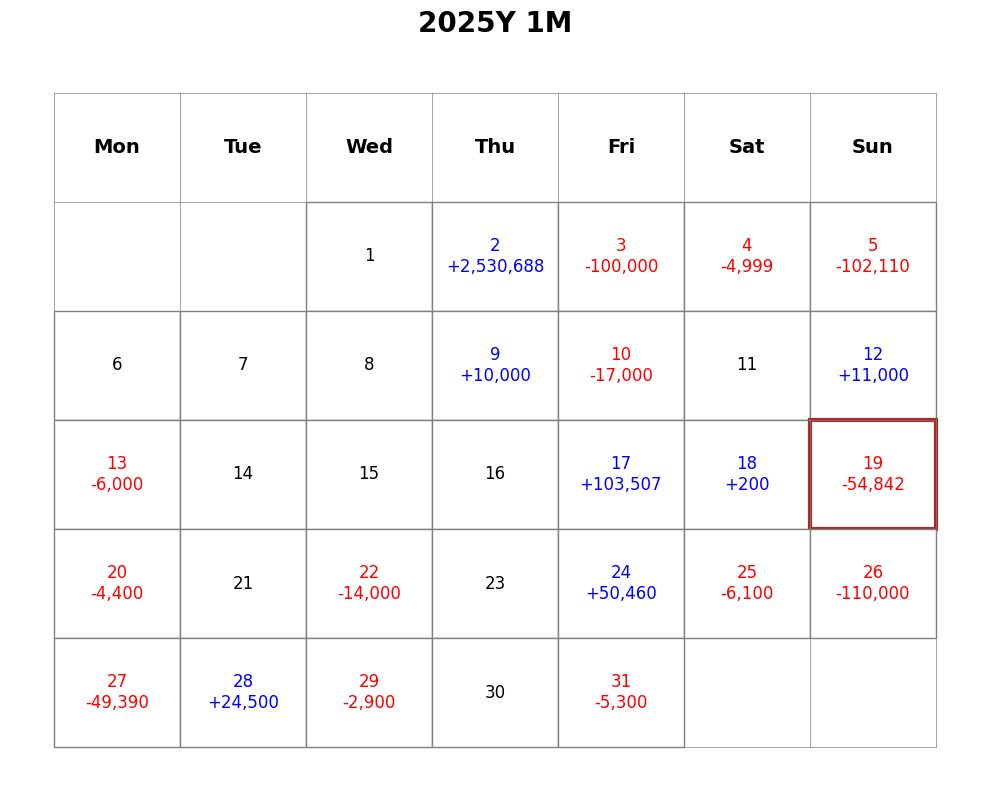

In [66]:
# 연도와 월 설정
year = 2025
month = 1

# 거래 데이터를 날짜와 금액으로 분리
days = [1, 2, 3, 4, 5, 9, 10, 12, 13, 17, 18, 19, 20, 22, 24, 25, 26, 27, 28, 29, 31]
amounts = [0, 2530688, -100000, -4999, -102110, 10000, -17000, 11000, -6000, 
           103507, 200, -54842, -4400, -14000, 50460, -6100, -110000, -49390, 24500, 
           -2900, -5300]

# 달력 생성
fig = create_calendar(year, month, days, amounts)

# 생성된 달력 저장
fig.savefig('calendar.png', dpi=200, bbox_inches='tight')
plt.show()

# ..

In [52]:
import calendar
import matplotlib.pyplot as plt
from datetime import datetime

def create_calendar(year: int, month: int, days: list[int], amounts:list[int]):
    """
    달력을 생성하고 반환하는 함수.
    
    Parameters:
        year (int): 연도
        month (int): 월
        days (list[int]): 거래가 발생한 날짜 리스트
        amounts (list[int]): 각 날짜에 해당하는 거래 금액 리스트
    
    Returns:
        matplotlib.figure.Figure: 생성된 달력의 Figure 객체
    """
    # 오늘 날짜 가져오기
    today = datetime.now()
    current_day = today.day if today.year == year and today.month == month else None

    # 날짜별 금액 데이터를 딕셔너리로 생성
    transactions = dict(zip(days, amounts))

    # 달력을 2D 배열로 생성
    cal = calendar.monthcalendar(year, month)

    # 달력 그리기
    fig, ax = plt.subplots(figsize=(10, 8))
    ax.axis('off')

    # 제목 표시
    ax.set_title(f"{year}Y {month}M", fontsize=20, weight='bold', pad=20)

    # 요일 헤더 생성
    week_days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
    for col, day in enumerate(week_days):
        ax.text(col, 6, day, ha='center', va='center', fontsize=14, weight='bold')

    # 날짜와 금액 데이터를 매핑하여 표시
    for row, week in enumerate(cal):
        for col, day in enumerate(week):
            if day != 0:  # 날짜가 있는 경우만 처리
                amount = transactions.get(day, 0)
                if amount > 0:
                    color = 'blue'
                elif amount < 0:
                    color = 'red'
                else:
                    color = 'black'

                # 오늘 날짜 강조: 두꺼운 검은 테두리 박스 추가
                if day == current_day:
                    ax.add_patch(plt.Rectangle((col - 0.5, 5 - row - 0.5), 1, 1, 
                                                edgecolor='brown', facecolor='none', linewidth=3))
                
                # 날짜를 둘러싼 기본 박스
                else:
                    ax.add_patch(plt.Rectangle((col - 0.5, 5 - row - 0.5), 1, 1, 
                                                edgecolor='gray', facecolor='white', linewidth=1))
                
                # 날짜와 금액 표시 (격자 중앙)
                ax.text(col, 5 - row, f"{day}\n{amount:+,}", ha='center', va='center',
                        fontsize=12, color=color)

    # 격자선 스타일 추가 (수평선과 수직선)
    for x in range(8):
        ax.plot([x - 0.5, x - 0.5], [0.5, 6.5], color='gray', linewidth=0.5)
    for y in range(1, 8):
        ax.plot([-0.5, 6.5], [y - 0.5, y - 0.5], color='gray', linewidth=0.5)

    # 마진 설정
    plt.tight_layout()

    return fig


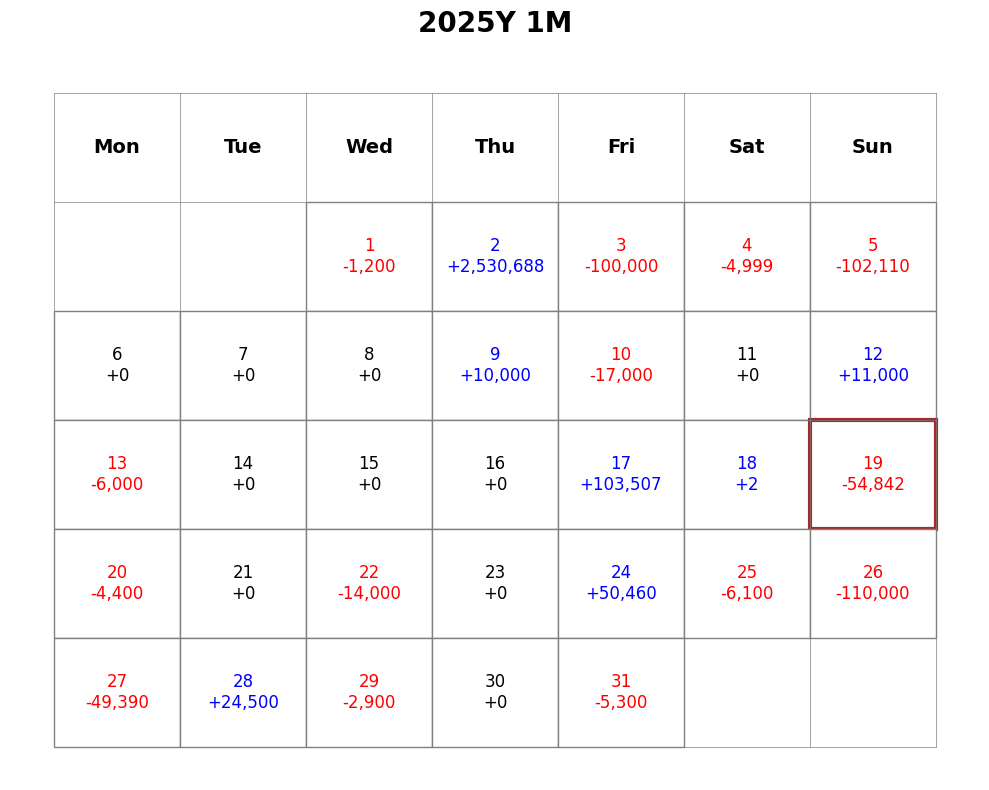

In [53]:
# 연도와 월 설정
year = 2025
month = 1

# 거래 데이터를 날짜와 금액으로 분리
days = [1, 2, 3, 4, 5, 9, 10, 12, 13, 17, 18, 19, 20, 22, 24, 25, 26, 27, 28, 29, 31]
amounts = [-1200, 2530688, -100000, -4999, -102110, 10000, -17000, 11000, -6000, 
           103507, 2, -54842, -4400, -14000, 50460, -6100, -110000, -49390, 24500, 
           -2900, -5300]

# 달력 생성
fig = create_calendar(year, month, days, amounts)

# 생성된 달력 저장
fig.savefig('calendar.png', dpi=200, bbox_inches='tight')
plt.show()
